Coutesy : Thanks to Sreedat Pana for the valuable guidance.

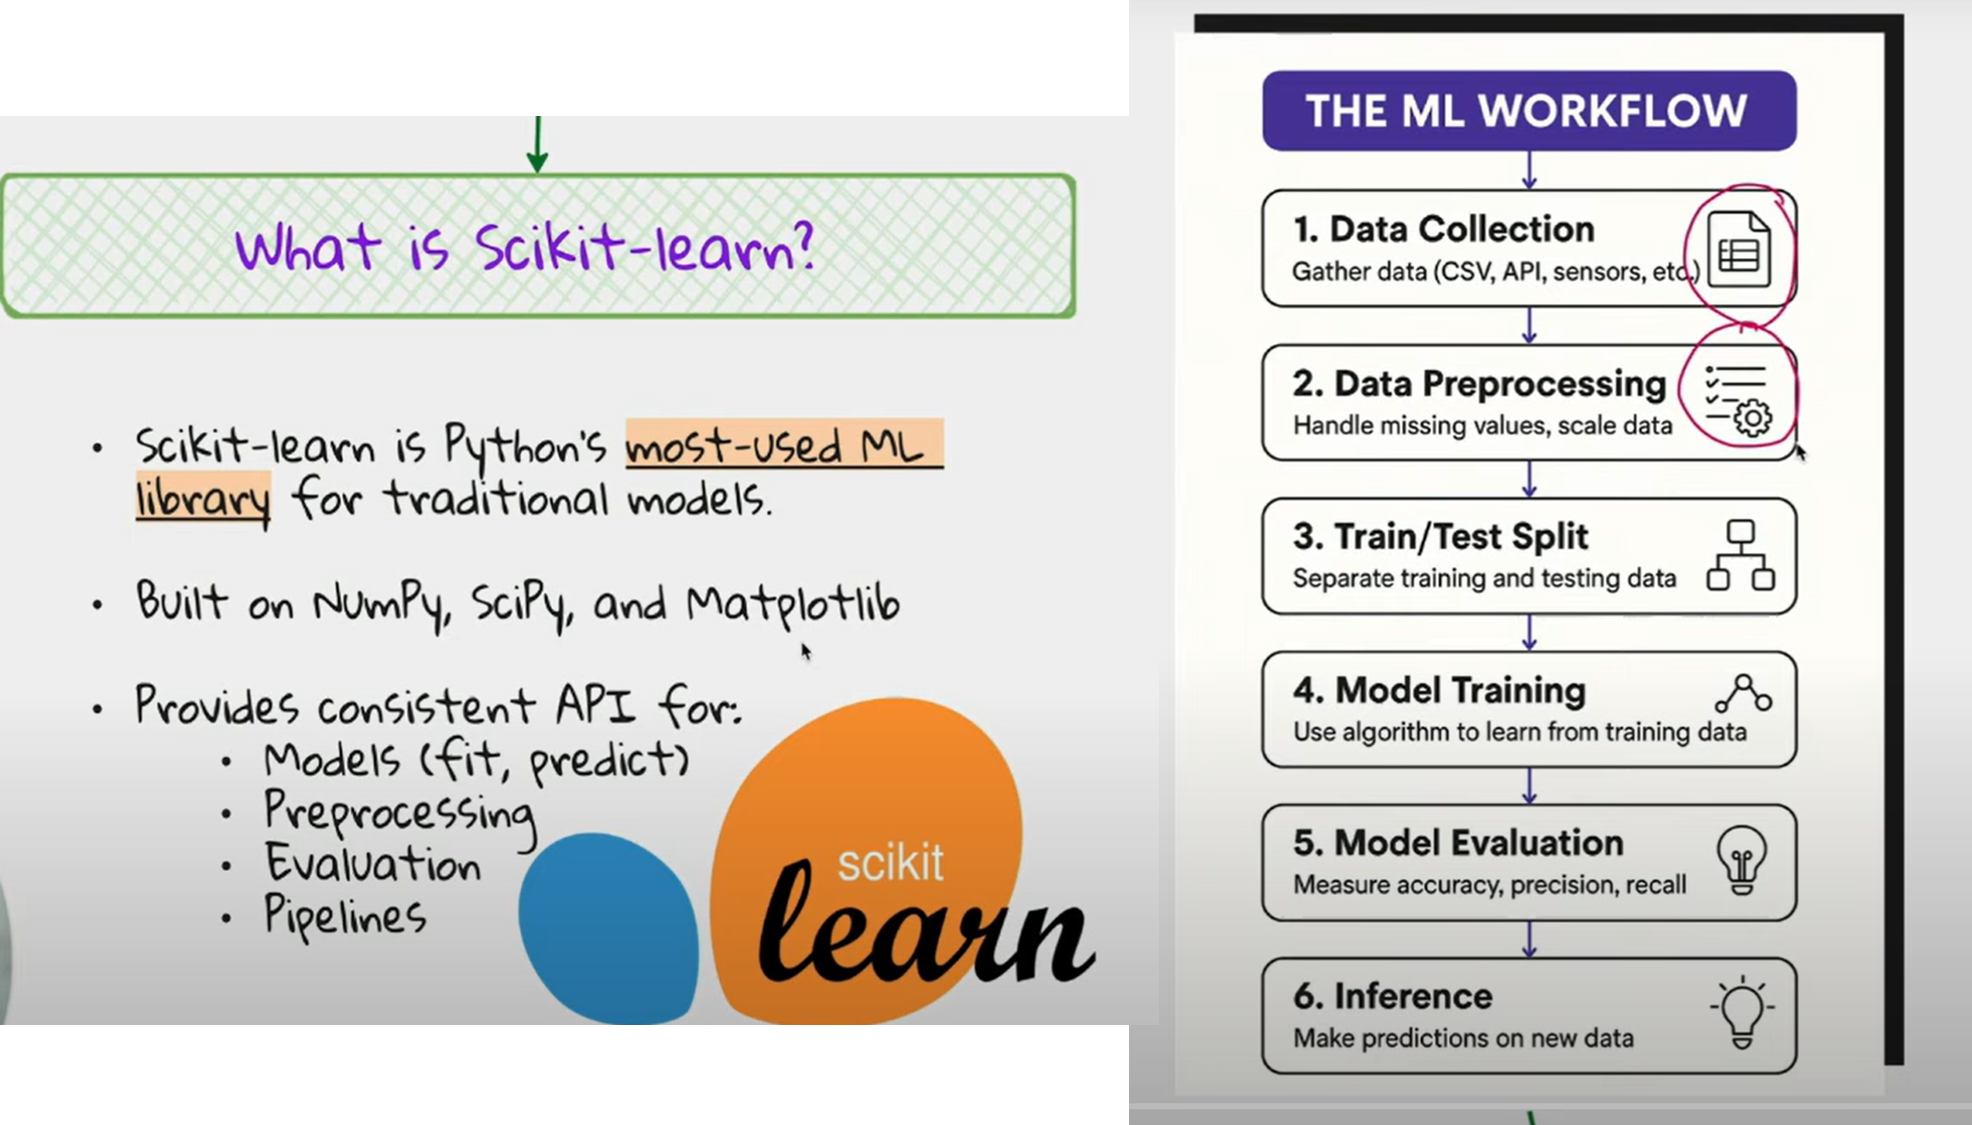

In [66]:
# 1. Loading data
from sklearn.datasets import load_iris
iris = load_iris()

In [67]:
import pandas as pd
X = pd.DataFrame(iris.data, columns = iris.feature_names)
#print(iris.feature_names) #labels/feature column names
#X.head()
#print(iris.target)
#print(iris.data) #data without lables
Y = pd.Series(iris.target)
print(f" y =  {y} ")
df =X.copy()
df['target'] = Y
df.tail()
# Target = 0,1,2 - 3 types of category

 y =  0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Text(0, 0.5, 'Count')

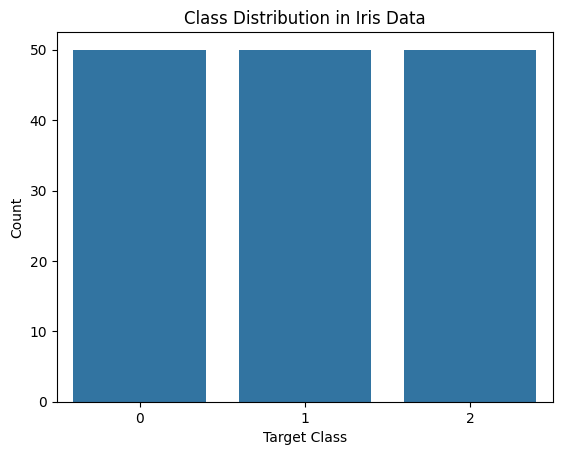

In [68]:
# Analysing data
#Class Distribution - Visualize data and understand data feature, relations, etc
import seaborn as sborn
sborn.countplot(x= df['target'])
#to give title we can use matplotlib
from matplotlib import pyplot as plt
plt.title("Class Distribution in Iris Data")
plt.xlabel("Target Class")
plt.ylabel("Count")

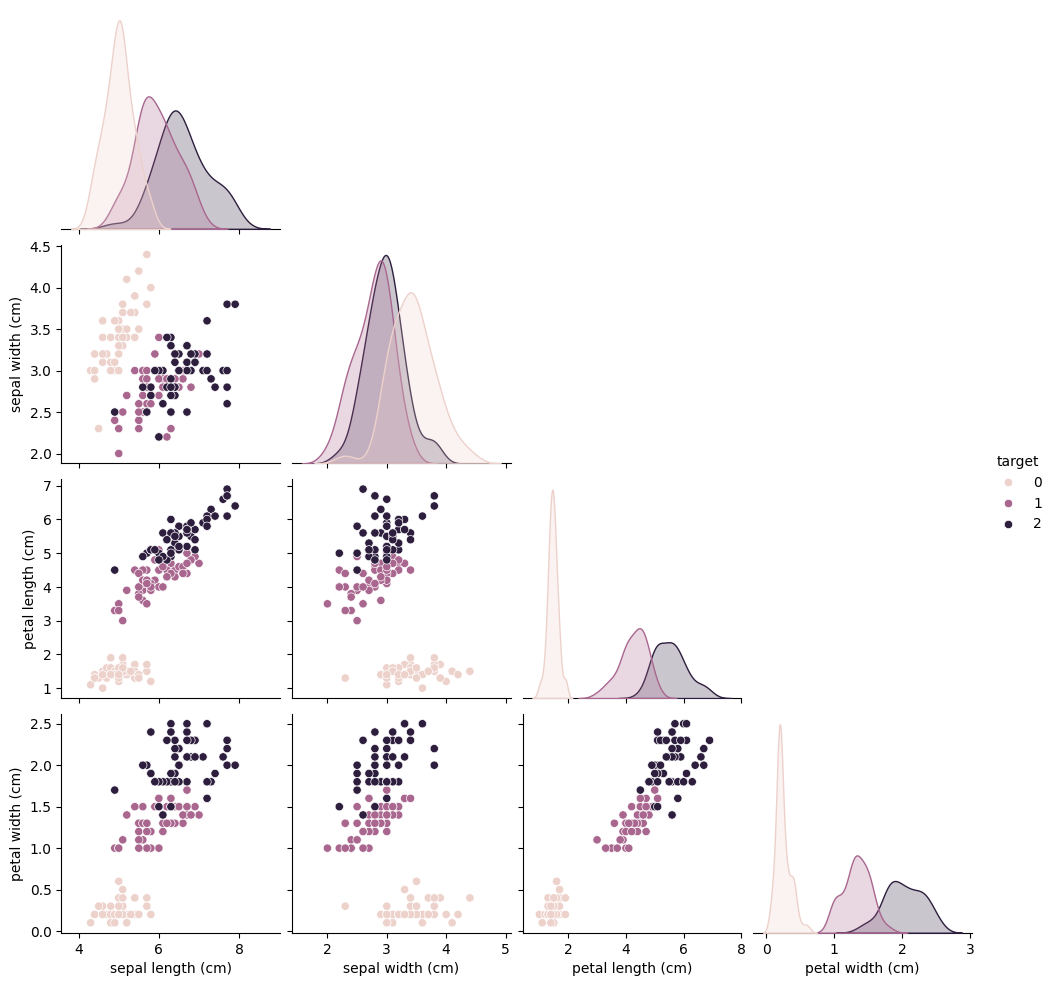

In [69]:
# Analysing data
sborn.pairplot(df, hue='target', corner=True)
plt.show()

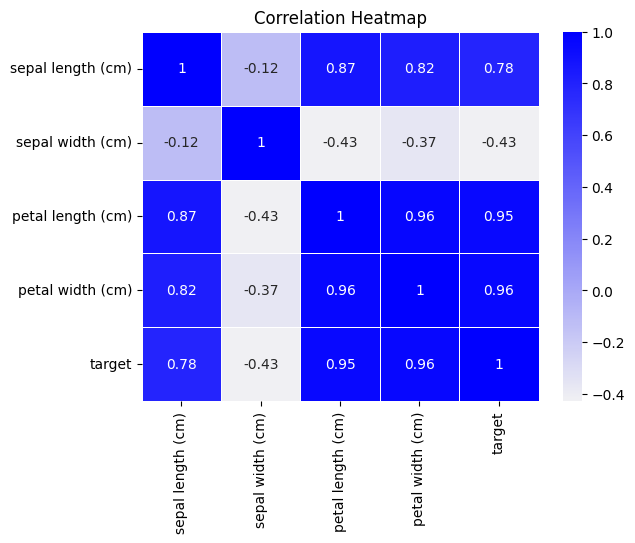

In [70]:
#Correlation with seaborn heatmap
# Custom gentle color palette
#cmap = sborn.light_palette("seagreen", as_cmap=True)
#sborn.heatmap(df.corr(), annot=True, cmap=cmap, linewidths=0.5, linecolor='white')
cmap = sborn.light_palette(color="blue",  as_cmap=True)
sborn.heatmap(df.corr(), annot=True, cmap=cmap, linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap")
plt.show()

#Note: We can see positive correlation between target and petal width and length (0.96, 0.95)

In [71]:
#3. Split data set
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [72]:
# 4. Scale the dateset
# scaling mean = 0 , standard Deviation =1, we convert the data into normal distribution how they diff from mean
from sklearn.preprocessing import StandardScaler

#Standard deviation mean =0 , sd= 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [73]:
# 5. Model Training using K-Neighbor model
#implement K=Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, Y_train)
Y_pred_knn =knn.predict(X_test)




In [74]:
# 5. Model Training using Decision Tree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, Y_train)
Y_pred_tree = tree.predict(X_test)

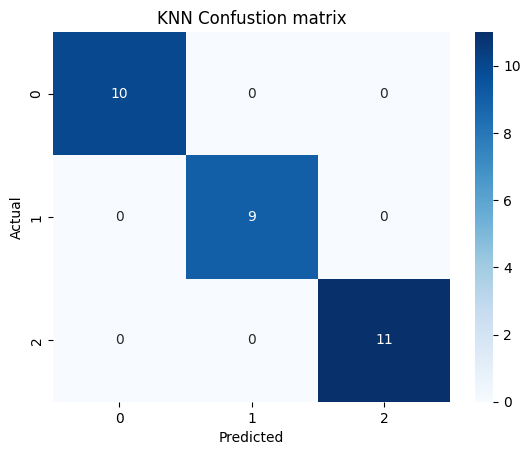

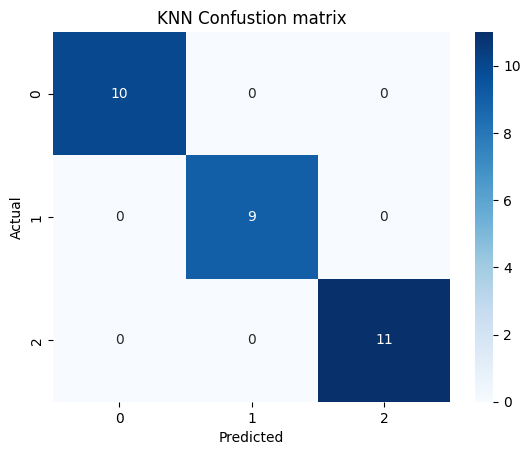

In [75]:
#6. Evaluation of model
from sklearn.metrics import confusion_matrix,  classification_report

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sborn.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion(Y_test, Y_pred_knn, "KNN Confustion matrix")  
plot_confusion(Y_test, Y_pred_tree, "KNN Confustion matrix")  



